<a href="https://colab.research.google.com/github/PsorTheDoctor/Sekcja-SI/blob/master/computer_vision/yolo/yolo_darknet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Object Detection - darknet
Wykorzystamy projekt pod nazwą `darknet` dostępny na GitHubie.

### Instalacja i import bibliotek

In [1]:
!pip install --upgrade opencv-python

Requirement already up-to-date: opencv-python in /usr/local/lib/python3.6/dist-packages (4.1.2.30)


In [0]:
import cv2
from google.colab.patches import cv2_imshow

In [0]:
%%bash
rm -rf /content/*

### Sklonowanie repozytorium darknet

In [6]:
%%bash
git clone https://github.com/pjreddie/darknet.git
cd darknet/
make

mkdir -p obj
mkdir -p backup
mkdir -p results
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/gemm.c -o obj/gemm.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/utils.c -o obj/utils.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/cuda.c -o obj/cuda.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/deconvolutional_layer.c -o obj/deconvolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/convolutional_layer.c -o obj/convolutional_layer.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/list.c -o obj/list.o
gcc -Iinclude/ -Isrc/ -Wall -Wno-unused-result -Wno-unknown-pragmas -Wfatal-errors -fPIC -Ofast -c ./src/image.c -o obj/image.o
gcc 

Cloning into 'darknet'...


### Pobranie wag modelu YOLOv3

In [23]:
%%bash
cd darknet
wget -q https://pjreddie.com/media/files/yolov3.weights
mkdir images

mkdir: cannot create directory ‘images’: File exists


### Wnioskowanie na podstawie modelu

In [24]:
%%bash
cd darknet
./darknet detect cfg/yolov3.cfg yolov3.weights images/office.jpeg

images/office.jpeg: Predicted in 23.975393 seconds.
cell phone: 68%
dog: 99%
person: 100%
person: 100%
person: 71%


layer     filters    size              input                output
    0 conv     32  3 x 3 / 1   608 x 608 x   3   ->   608 x 608 x  32  0.639 BFLOPs
    1 conv     64  3 x 3 / 2   608 x 608 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    2 conv     32  1 x 1 / 1   304 x 304 x  64   ->   304 x 304 x  32  0.379 BFLOPs
    3 conv     64  3 x 3 / 1   304 x 304 x  32   ->   304 x 304 x  64  3.407 BFLOPs
    4 res    1                 304 x 304 x  64   ->   304 x 304 x  64
    5 conv    128  3 x 3 / 2   304 x 304 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    6 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
    7 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
    8 res    5                 152 x 152 x 128   ->   152 x 152 x 128
    9 conv     64  1 x 1 / 1   152 x 152 x 128   ->   152 x 152 x  64  0.379 BFLOPs
   10 conv    128  3 x 3 / 1   152 x 152 x  64   ->   152 x 152 x 128  3.407 BFLOPs
   11 res    8                 152 x 

### Wyświetlenie predykcji

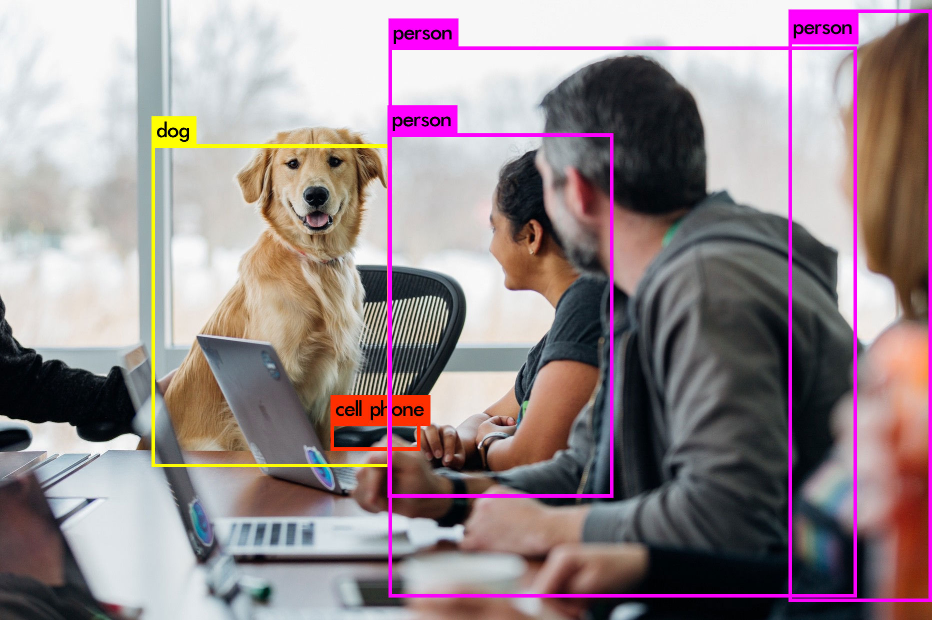

In [30]:
img = cv2.imread('darknet/predictions.jpg')
img = cv2.resize(img, (932, 620))
cv2_imshow(img)